<a href="https://colab.research.google.com/github/SantiagoMorenoV/Position-vs-Salaries/blob/main/R/Pos_Salaries_Dec_Tree_Reg_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Did the interviewee tell the truth?**

An HR recruiter wants to know if a candidate told the truth or not about his salary in his previous position.

For this case, I have a dataset with the positions and salaries from the company where the candidate used to work.

# **Importing the dataset**

In [4]:
dataset = read.csv('https://raw.githubusercontent.com/SantiagoMorenoV/Position-vs-Salaries/main/Position_Salaries.csv')
dataset
dataset = dataset[2:3]
dataset

Position,Level,Salary
<chr>,<int>,<int>
Business Analyst,1,45000
Junior Consultant,2,50000
Senior Consultant,3,60000
Manager,4,80000
Country Manager,5,110000
Region Manager,6,150000
Partner,7,200000
Senior Partner,8,300000
C-level,9,500000


Level,Salary
<int>,<int>
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000
7,200000
8,300000
9,500000


With dataset = dataset[2:3], I keep the second and third columns, which are the columns that I will use in the model.

# **Plotting Data**

There are two ways of plotting Salary vs Position. With the library ggplot and by using the R's function "plot()" to create a scatter plot.

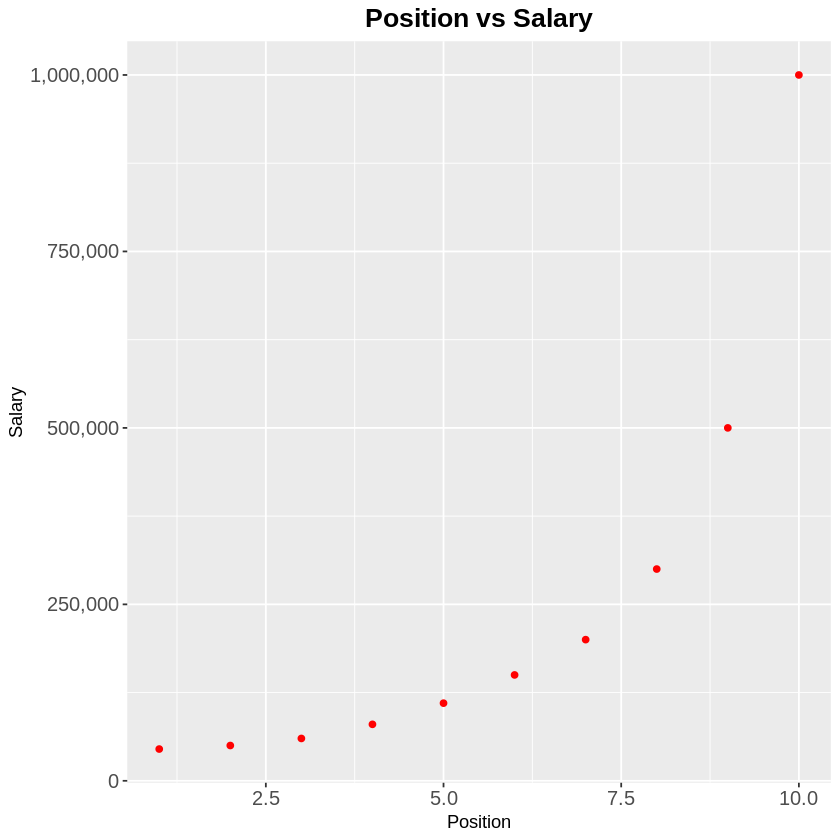

In [5]:
library(ggplot2)
library(scales)
ggplot(data = dataset, aes(x = Level, y = Salary)) +
  geom_point(color = "red") +
  labs(x = "Position", y = "Salary", title = "Position vs Salary") +
  theme(plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12)) +
  scale_y_continuous(labels = comma)

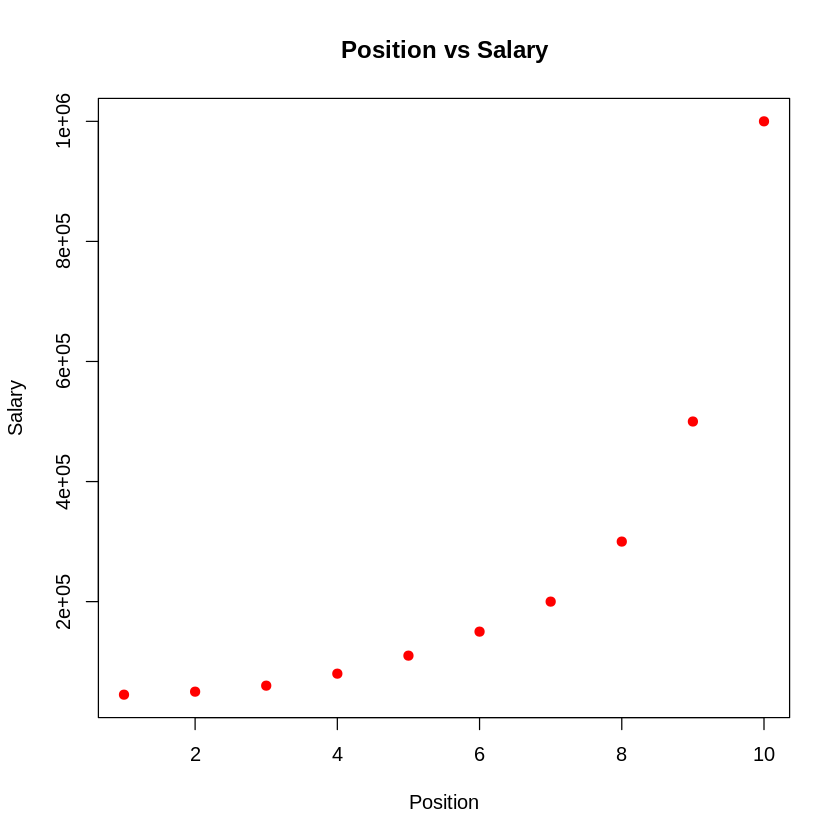

In [6]:
plot(dataset$Level, dataset$Salary, col = "red", pch = 19,
     xlab = "Position", ylab = "Salary", main = "Position vs Salary")

# **Descriptive Statistics**

In [7]:
summary(dataset)

     Level           Salary       
 Min.   : 1.00   Min.   :  45000  
 1st Qu.: 3.25   1st Qu.:  65000  
 Median : 5.50   Median : 130000  
 Mean   : 5.50   Mean   : 249500  
 3rd Qu.: 7.75   3rd Qu.: 275000  
 Max.   :10.00   Max.   :1000000  

# **Salary distribution**

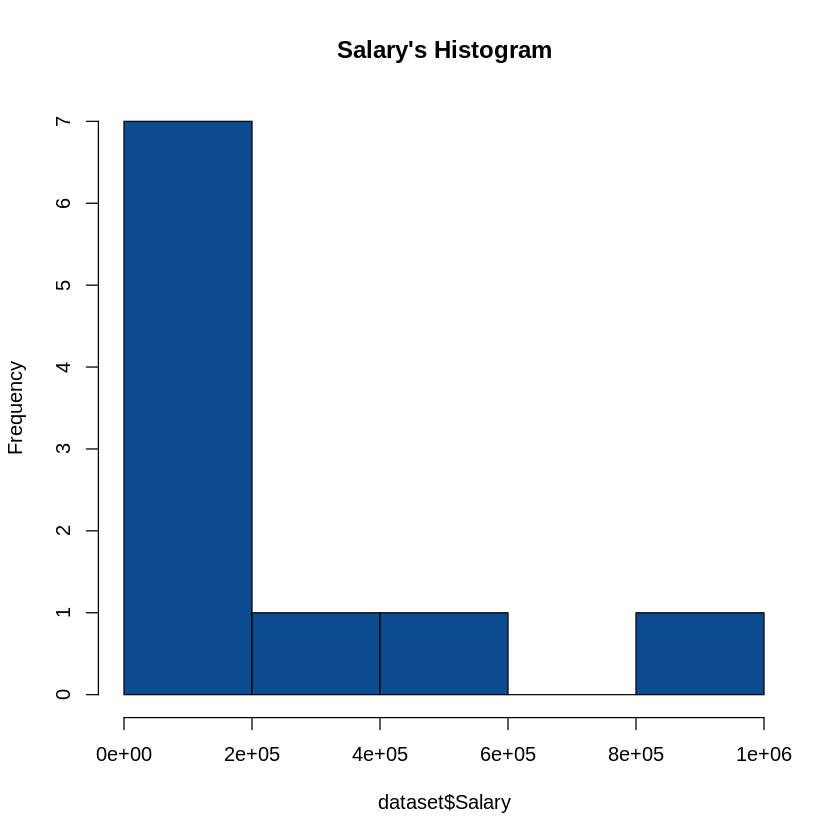

In [8]:
hist(dataset$Salary, main ="Salary's Histogram", col= '#0E4C92')

# **Boxplot**

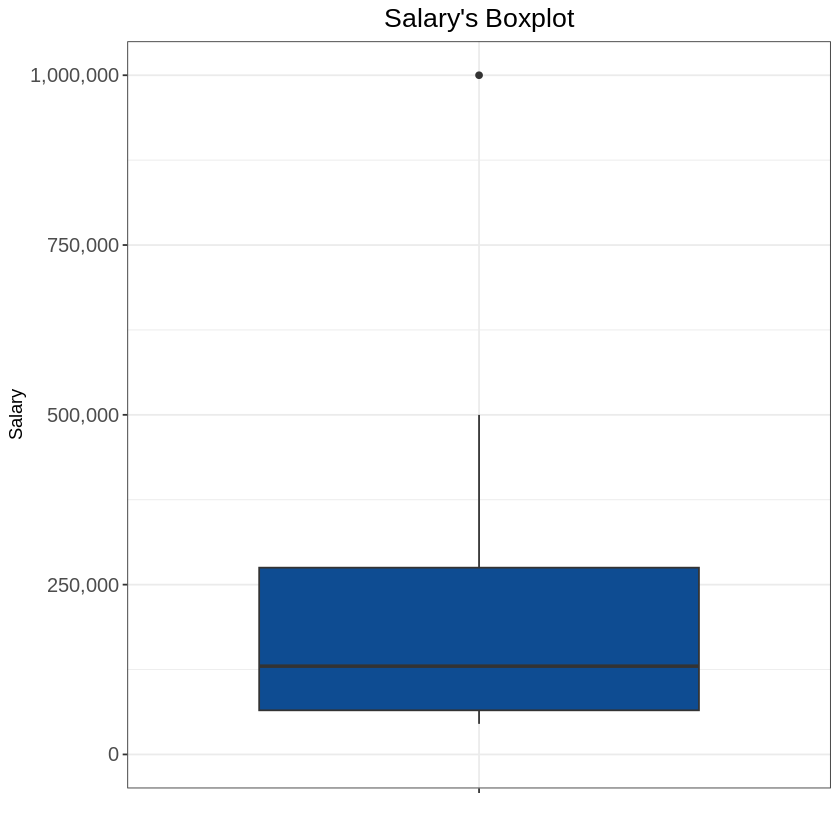

In [9]:
#install.packages("ggplot2")
library(ggplot2)
library(scales)
variables <- c("Salary")
for (var in variables) {
  print(ggplot(data = dataset, aes(x = "", y = dataset[,var])) +
    geom_boxplot(fill = "#0E4C92") +
    labs(x = "", y = var, title = paste0(var, "'s Boxplot")) +
    scale_y_continuous(labels = comma, limits = c(0, max(dataset[,var]))) +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5, size = 16),
          axis.text.y = element_text(size = 12)))
}

# **Fitting the Decision Tree Regression on the whole dataset**

In [22]:
#install.packages('rpart')
library(rpart)
regressor = rpart(formula = Salary ~ .,
                  data = dataset,
                  control = rpart.control(minsplit = 1))
print(regressor)

n= 10 

node), split, n, deviance, yval
      * denotes terminal node

1) root 10 806622500000  249500  
  2) Level< 8.5 8  55371880000  124375  
    4) Level< 6.5 6   8287500000   82500 *
    5) Level>=6.5 2   5000000000  250000 *
  3) Level>=8.5 2 125000000000  750000  
    6) Level< 9.5 1            0  500000 *
    7) Level>=9.5 1            0 1000000 *


Call:
rpart(formula = Salary ~ ., data = dataset, control = rpart.control(minsplit = 1))
  n= 10 

          CP nsplit  rel error   xerror      xstd
1 0.77638626      0 1.00000000 1.234568 0.7835133
2 0.15496716      1 0.22361374 1.207740 0.7865867
3 0.05217357      2 0.06864658 1.196733 0.7881817
4 0.01000000      3 0.01647301 1.199870 0.7877478

Variable importance
Level 
  100 

Node number 1: 10 observations,    complexity param=0.7763863
  mean=249500, MSE=8.066225e+10 
  left son=2 (8 obs) right son=3 (2 obs)
  Primary splits:
      Level < 8.5 to the left,  improve=0.7763863, (0 missing)

Node number 2: 8 observations,    complexity param=0.05217357
  mean=124375, MSE=6.921484e+09 
  left son=4 (6 obs) right son=5 (2 obs)
  Primary splits:
      Level < 6.5 to the left,  improve=0.7600316, (0 missing)

Node number 3: 2 observations,    complexity param=0.1549672
  mean=750000, MSE=6.25e+10 
  left son=6 (1 obs) right son=7 (1 obs)
  Primary splits:
      Level < 9.5 to the left,

NULL


Regression tree:
rpart(formula = Salary ~ ., data = dataset, control = rpart.control(minsplit = 1))

Variables actually used in tree construction:
[1] Level

Root node error: 8.0662e+11/10 = 8.0662e+10

n= 10 

        CP nsplit rel error xerror    xstd
1 0.776386      0  1.000000 1.2346 0.78351
2 0.154967      1  0.223614 1.2077 0.78659
3 0.052174      2  0.068647 1.1967 0.78818
4 0.010000      3  0.016473 1.1999 0.78775


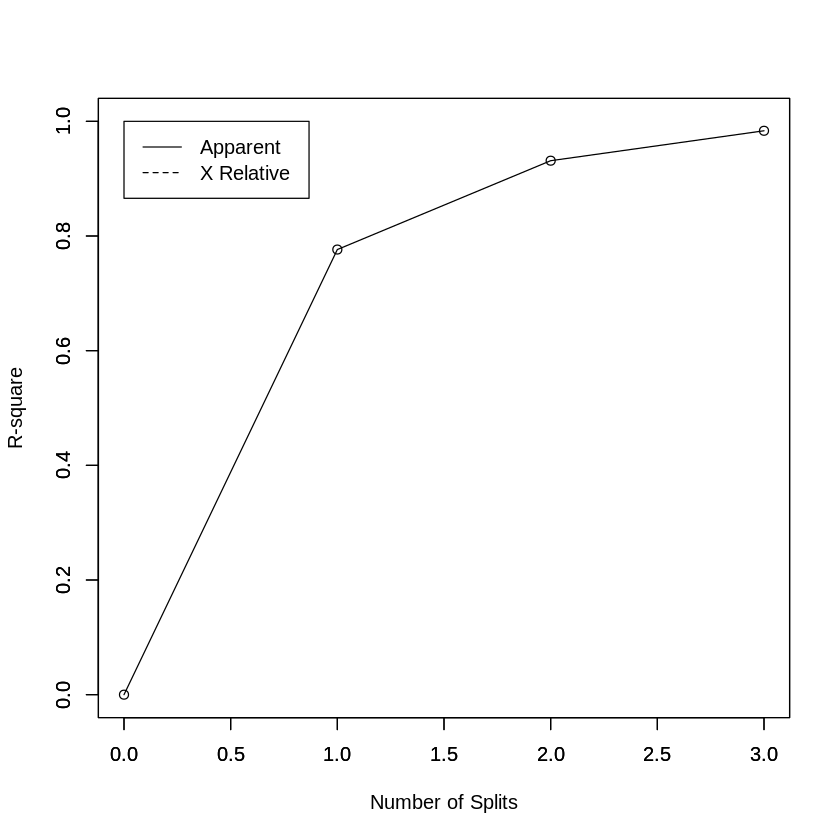

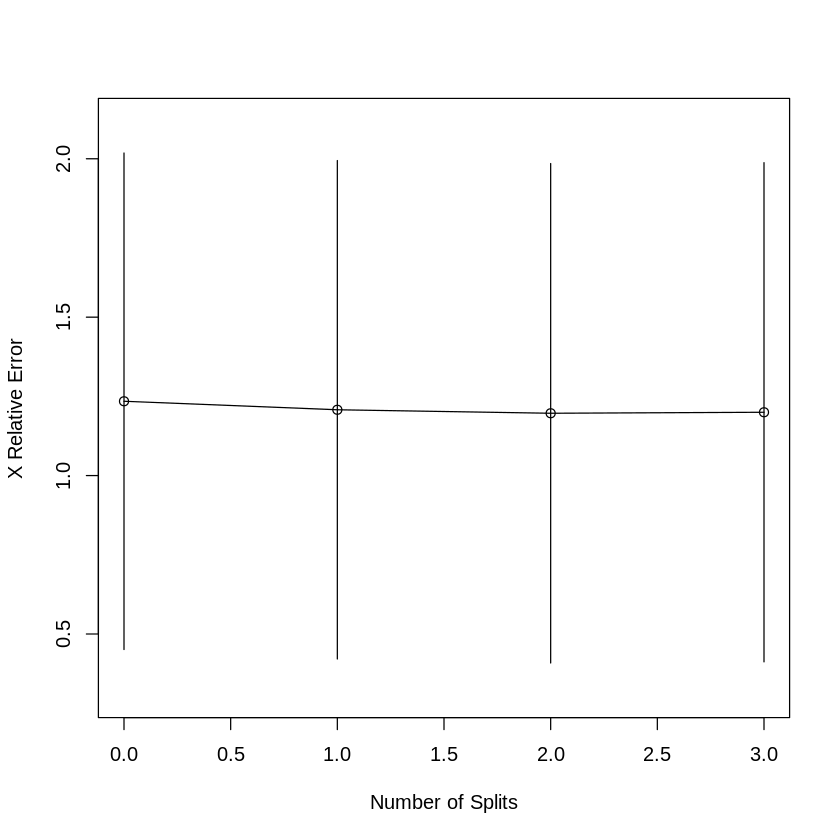

In [24]:
summary(regressor)$r.squared
rsq.rpart(regressor)

# **Predicting the salary**

In [19]:
y_pred = predict(regressor, data.frame(Level = 6.5))
y_pred

1 
250000

# **Visualising the Decision Tree Regression results (for higher resolution and smoother curve)**

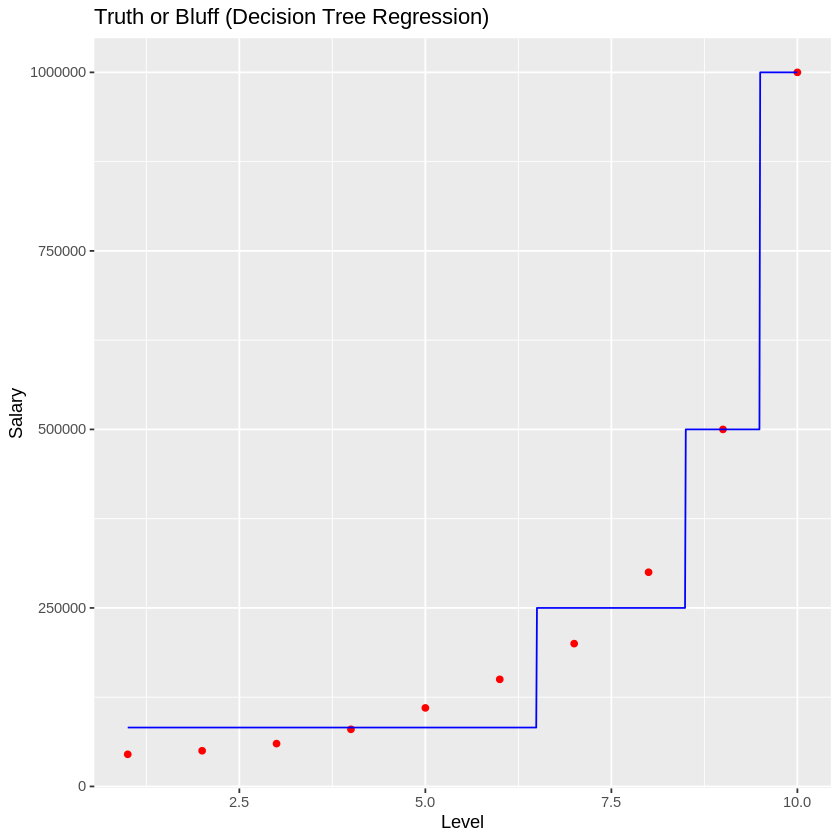

In [20]:
# install.packages('ggplot2')
library(ggplot2)
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.01)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(regressor, newdata = data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Decision Tree Regression)') +
  xlab('Level') +
  ylab('Salary')

# **Discussion**

Once evaluated that the previous position of the candidate was Regional Manager, he had been working in that role for two years, and also that, once gotten data from the previous company, it was possible to classify him as an intermediate-level in the 6-7 range or between Regional Manager and Partner. In other words, a 6.5 position level.

The Decision Tree Regression (DTR) predicted this candidate's salary of USD 250K, more than his answer, USD 160K per year. This time, as I got a 100% R-squared and the DTR has only one dimension, this model might be overfitted. Consequently, it would end up showing incorrect predictions and unreliable results.

Yet, this is an interesting academic exercise, and working with a higher dimensional DTR could result in better performance regarding reducing overfitting.